# DS106-02-03-ML - k-Means Clustering in Python
---

## Import Packages

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

---
## Load in Data

In [4]:
# load data -> seaborn dataset `iris`
iris = sns.load_dataset('iris')

---
## Data Wrangling
- The `KMeans()` function cannot handle cells that are strings, so you will create a new DataFrame that is the same as the old one, but without the `species` column. 
- If there was data you actually wanted to use in a string variable, you could instead re-code that variable numerically; 
- In this case, you can just drop species using `drop()`.

In [6]:
# KMeans() cannot use string values
# Create a dataframe without column with dtype string
irisTrimmed = iris.drop('species', axis=1)

---
## Perform k-Means
Use the function `KMeans()` to specify the number of clusters, and then fit it using `fit()`.

In [7]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(irisTrimmed)

KMeans(n_clusters=2)

---
## Utilizing k-Means
Use the results to plot the data.
- Create a figure
- Add a title
- Create a scatter plot:
    - x-axis: `petal-length`
    - y-axis: `petal_width`
- `c=kmeans.labels`: the dot color will be basd on created clusters
- `cmap=`: color scheme argument

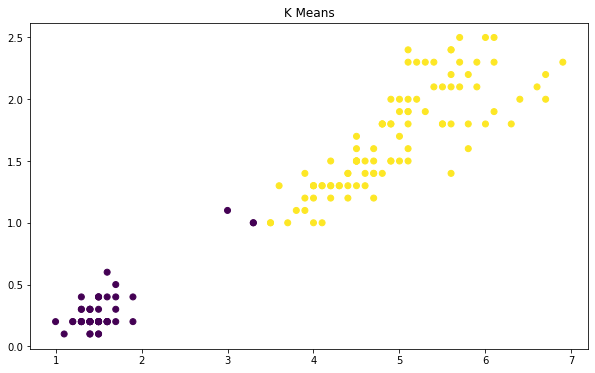

In [9]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.scatter(irisTrimmed['petal_length'], irisTrimmed['petal_width'], c=kmeans.labels_, cmap='viridis')

In [10]:
# get data back into usable form
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [11]:
# add this data back into dataframe as new column
irisTrimmed['Group'] = kmeans.labels_

In [12]:
irisTrimmed.head()

,sepal_length,sepal_width,petal_length,petal_width,Group
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# find the `centroid` (center point) of your clusters
kmeans.cluster_centers_

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

In [14]:
# find total distance of every point from its cluster center
kmeans.inertia_

152.3479517603579

#### _Note: It is rare that finding the centroid or the distance from each centroid will be required. Focus on plotting your data and knowing how to add the results back into your DataFrame, so you can use it._